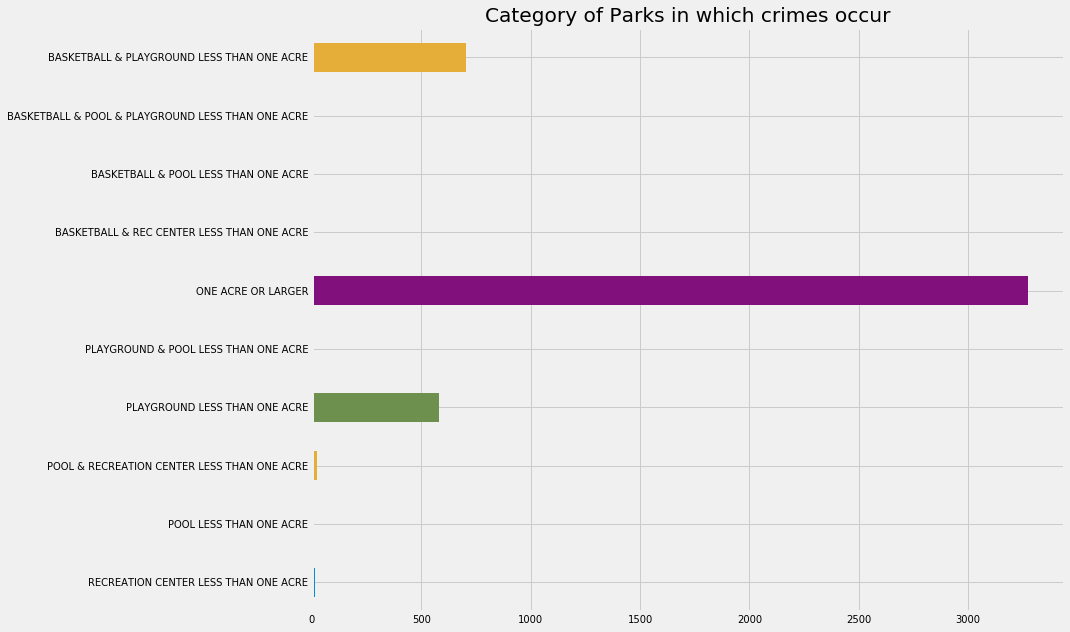

In [3]:
#Visualization with the help of matplotlib on raw data
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
#read database
data = pd.read_csv('Datasets/nyc-park-crime-2016.csv', na_values=['NA'], dtype='unicode')

category = pd.DataFrame(data, columns = ['CATEGORY']) 
count_category = category.stack().value_counts()
total = count_category.sort_index(axis=0, ascending=False)
#plot the total of homicides
total.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Category of Parks in which crimes occur');

Text(0,0.5,'Total Crime')

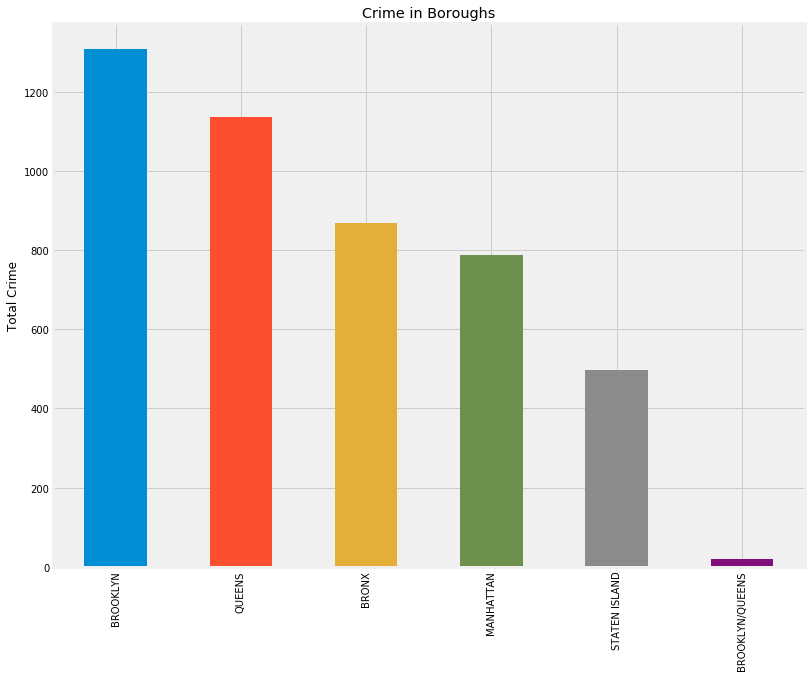

In [4]:
#Bar Chart to determine crime in NYC

borough = pd.DataFrame(data, columns = ['BOROUGH']) 
count_borough = borough.stack().value_counts()
ax = count_borough.plot(kind = 'bar',
                              title = 'Crime in Boroughs',
                              fontsize=10,  width=0.5,  figsize=(12, 10))
ax.set_ylabel('Total Crime')

Text(0,0.5,'Total Crimes')

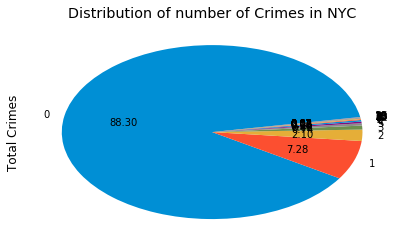

In [5]:
## Total Distribution
solved = pd.DataFrame(data, columns = ['TOTAL']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie',
                              title = 'Distribution of number of Crimes in NYC',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('Total Crimes')

([<matplotlib.patches.Wedge at 0x7f6ebbf13f98>,
 [Text(-0.0379168,1.59955,'Murder'),
  Text(-0.215293,2.08893,'Rape'),
  Text(-0.238516,1.07383,'Burglary'),
  Text(-1.07476,0.234272,'Robbery'),
  Text(-0.184512,-1.08441,'Felony Assault'),
  Text(1.0811,0.203046,'Grand Larceny')],
 [Text(-0.0260678,1.09969,'0.8%'),
  Text(-0.164033,1.59157,'1.8%'),
  Text(-0.130099,0.585725,'1.9%'),
  Text(-0.586235,0.127785,'34.3%'),
  Text(-0.100643,-0.591499,'17.2%'),
  Text(0.58969,0.110752,'44.1%')])

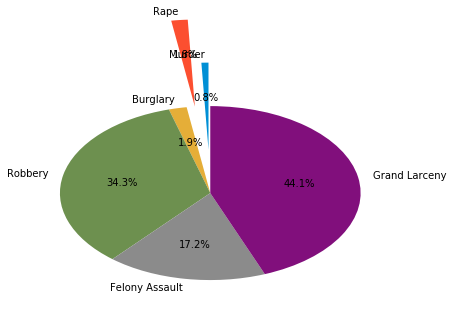

In [6]:
## Murder Distribution
murder_total = data['MURDER'].astype(float).sum()
rape_total = data['RAPE'].astype(float).sum()
burglary_total = data['BURGLARY'].astype(float).sum()
robbery_total = data['ROBBERY'].astype(float).sum()
felony_assault_total = data['FELONY ASSAULT'].astype(float).sum()
grand_larceny_total = data['GRAND LARCENY'].astype(float).sum()
labels_pie = ["Murder", "Rape", "Burglary", "Robbery","Felony Assault","Grand Larceny"]
value = [murder_total, rape_total, burglary_total, robbery_total, felony_assault_total, grand_larceny_total]

plt.pie(value, labels=labels_pie, startangle=90, autopct='%.1f%%',explode=(0.5, 1.0, 0, 0, 0, 0))

In [32]:
#Visualization with the help of matplotlib on raw data
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
#read refined database

import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Visualization').getOrCreate()


df = spark.read.csv('Datasets/good-nyc-park-crime-2016.csv',header=True,inferSchema=True)
df.show()

+---+--------------------+---------------+-------+------------------+------+----+-------+--------------+--------+-------------+------------------------------+-----+-------------+--------------+
|_c0|                PARK|        BOROUGH|QUARTER|          CATEGORY|MURDER|RAPE|ROBBERY|FELONY ASSAULT|BURGLARY|GRAND LARCENY|GRAND LARCENY OF MOTOR VEHICLE|TOTAL|CRIME OCCURED|VICIOUS CRIMES|
+---+--------------------+---------------+-------+------------------+------+----+-------+--------------+--------+-------------+------------------------------+-----+-------------+--------------+
|  0|     PELHAM BAY PARK|          BRONX|      1|ONE ACRE OR LARGER|   0.0| 1.0|    1.0|           0.0|     0.0|          0.0|                           0.0|    2|            1|           1.0|
|  1|  VAN CORTLANDT PARK|          BRONX|      1|ONE ACRE OR LARGER|   0.0| 0.0|    2.0|           1.0|     0.0|          0.0|                           0.0|    3|            1|           0.0|
|  2|ROCKAWAY BEACH AN...|    

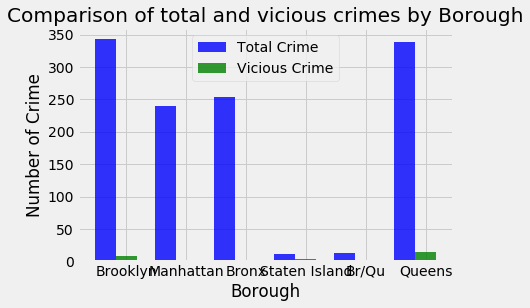

<Figure size 2880x1440 with 0 Axes>

In [77]:
import pyspark.sql.functions as func

group_data = df.groupBy("BOROUGH").agg(func.sum("VICIOUS CRIMES"))
new_group_data = df.groupBy("BOROUGH").agg(func.sum("TOTAL"))

values = group_data.groupBy('sum(VICIOUS CRIMES)').count().collect() 
val_bor = group_data.groupBy('BOROUGH').count().collect() 
values_new = new_group_data.groupBy('sum(TOTAL)').count().collect() # list of Rows


vicious_crimes = [i[0] for i in values]
borough = [i[0] for i in val_bor]
total = [i[0] for i in values_new]

 
# data to plot
n_groups = 6
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, total, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Total Crime')
 
rects2 = plt.bar(index + bar_width, vicious_crimes, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Vicious Crime')
 
plt.xlabel('Borough')
plt.ylabel('Number of Crime')
plt.title('Comparison of total and vicious crimes by Borough')
plt.xticks(index + bar_width, ('Brooklyn', 'Manhattan', 'Bronx','Staten Island','Br/Qu','Queens'))
plt.legend()

plt.figure(figsize=(40, 20))
 
plt.show()



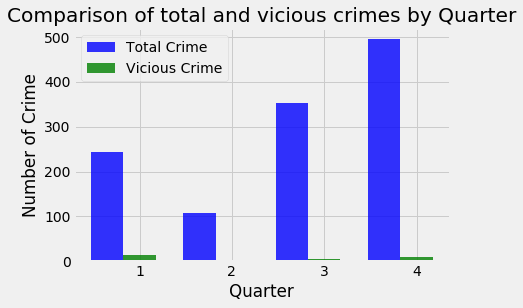

<Figure size 2880x1440 with 0 Axes>

In [96]:
import pyspark.sql.functions as func

group_data = df.groupBy("QUARTER").agg(func.sum("VICIOUS CRIMES"))
new_group_data = df.groupBy("QUARTER").agg(func.sum("TOTAL"))

values = group_data.groupBy('sum(VICIOUS CRIMES)').count().collect() 
val_bor = group_data.groupBy('QUARTER').count().collect() 
values_new = new_group_data.groupBy('sum(TOTAL)').count().collect() # list of Rows


vicious_crimes = [i[0] for i in values]
quarter = [i[0] for i in val_bor]
total = [i[0] for i in values_new]

 
# data to plot
n_groups = 4
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, total, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Total Crime')
 
rects2 = plt.bar(index + bar_width, vicious_crimes, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Vicious Crime')
 
plt.xlabel('Quarter')
plt.ylabel('Number of Crime')
plt.title('Comparison of total and vicious crimes by Quarter')
plt.xticks(index + bar_width, sorted(quarter))
plt.legend()

plt.figure(figsize=(40, 20))
 
plt.show()



Text(0.5,0.98,'Borough By Total')

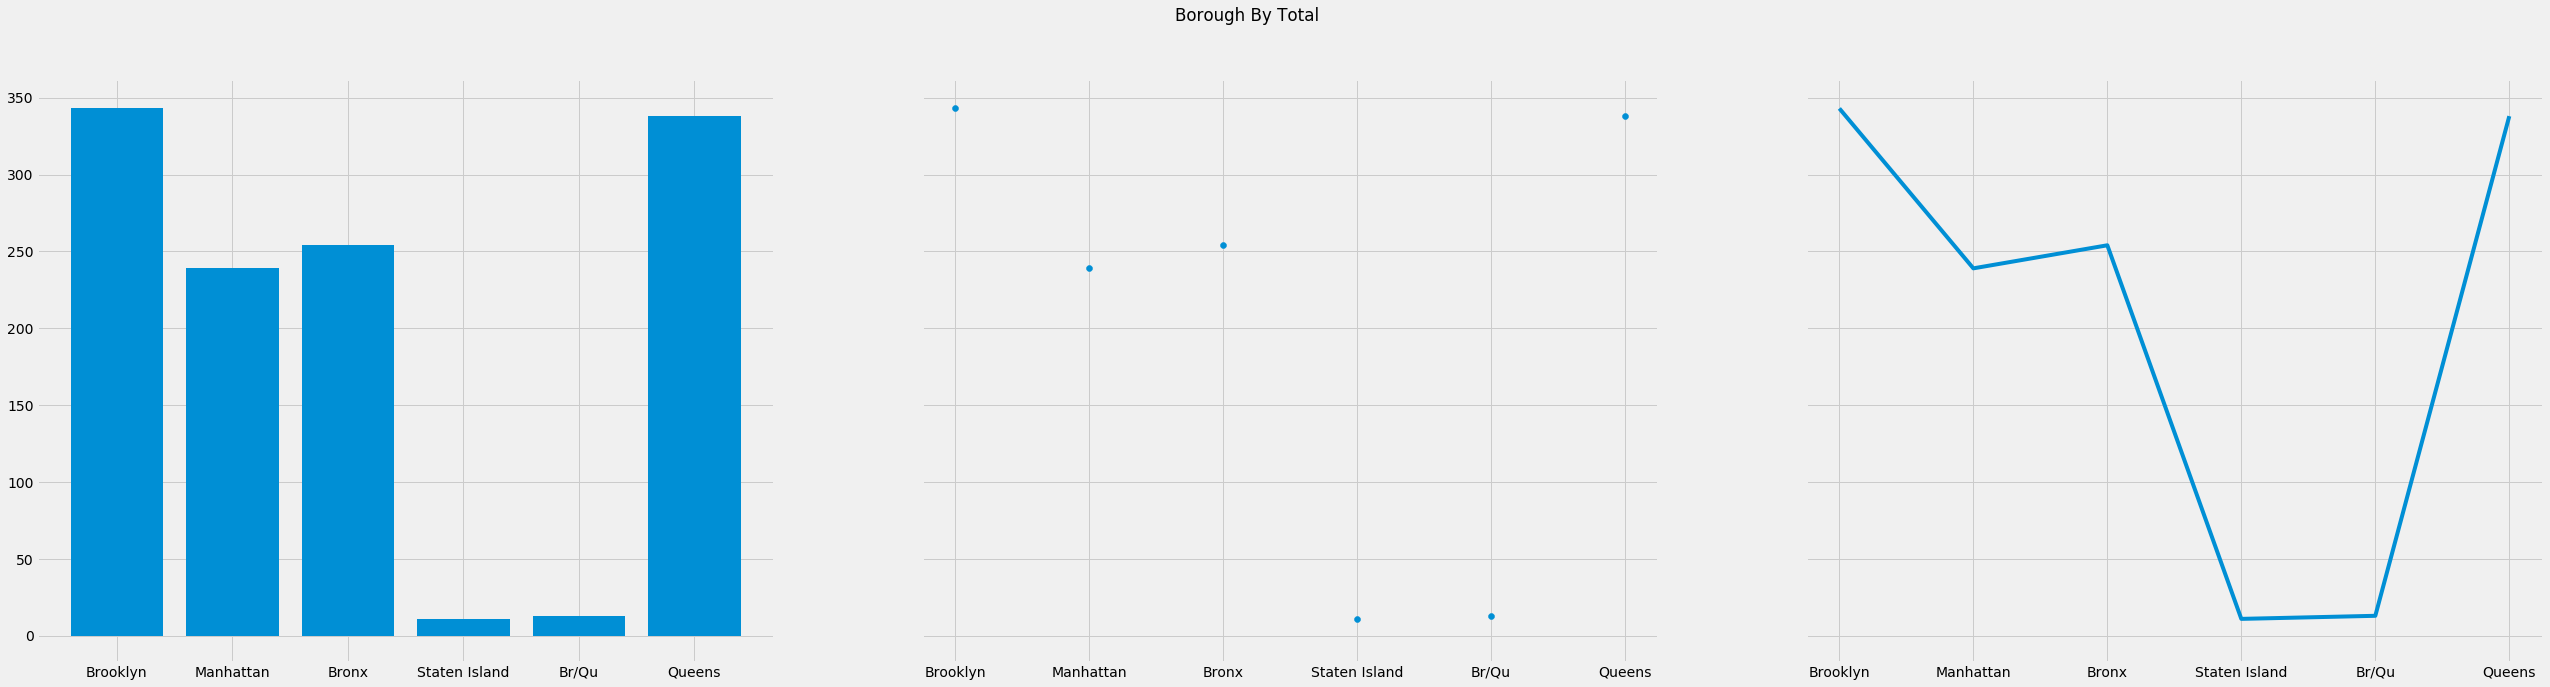

In [100]:
import pyspark.sql.functions as func

new_group_data = df.groupBy("BOROUGH").agg(func.sum("TOTAL"))

val_bor = new_group_data.groupBy('BOROUGH').count().collect() 
values_new = new_group_data.groupBy('sum(TOTAL)').count().collect() # list of Rows


borough = [i[0] for i in val_bor]
total = [i[0] for i in values_new]

new_borough = ['Brooklyn', 'Manhattan','Bronx', 'Staten Island', 'Br/Qu', 'Queens']

fig, axs = plt.subplots(1, 3, figsize=(40, 10), sharey=True)
axs[0].bar(new_borough, total)
axs[1].scatter(new_borough, total)
axs[2].plot(new_borough, total)
fig.suptitle('Borough By Total')


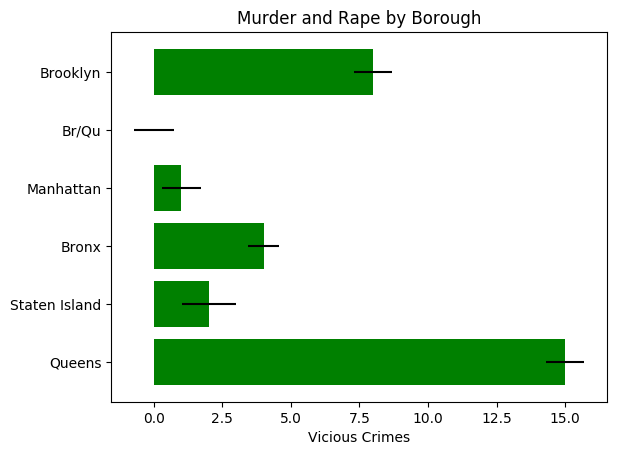

In [102]:

import pyspark.sql.functions as func

new_group_data = df.groupBy("BOROUGH").agg(func.sum("VICIOUS CRIMES"))

val_bor = new_group_data.groupBy('BOROUGH').count().collect() 
values_new = new_group_data.groupBy('sum(VICIOUS CRIMES)').count().collect() # list of Rows


borough = [i[0] for i in val_bor]
total = [i[0] for i in values_new]

new_borough = ['Brooklyn', 'Br/Qu','Manhattan','Bronx', 'Staten Island', 'Queens']

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(new_borough))
error = np.random.rand(len(new_borough))

ax.barh(y_pos, total, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(new_borough)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Vicious Crimes')
ax.set_title('Murder and Rape by Borough')

plt.show()